# Shreya Somani
## 101917127
## Building Innovative Systems - Prediction in time series dataset

### Libraries Import

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

### Dataset Import 

In [4]:
dataset = pd.read_excel('DATASET.xlsx')

In [5]:
dataset

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1006,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1007,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1008,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [6]:
#Proving each section with similar section name
j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

### Data Preprocessing

In [7]:
# Manually added row 10 in Section 9 as earlier only 9 rows were present

In [8]:
#Renaming first column
dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Group')

In [9]:
#Replacing empty cells with zero
dataset.fillna(0, inplace=True)

In [10]:
#Test data
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
979,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
989,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
999,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [11]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Group')

In [12]:
dataset.head(12)

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.810
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.860
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.890
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.920
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960


## Model Definition 

In [39]:
etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [40]:
predict_col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [41]:
result = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

## Model Application

In [54]:
def extraregressor():
    RMSE = []
    N = 0
    index = 0
    for j in [10, 11, 12, 13, 14]:
        ans = 0
        count = 0
        for i in range(0, 1000, 10):
            xtrain = dataset.iloc[i:i+9, 1:10]
            ytrain = dataset.iloc[i:i+9, j]
            xtest = dataset.iloc[i+9, 1:10].to_numpy()
            ytest = dataset.iloc[i+9, j]
            etr.fit(xtrain, ytrain)
            ypred = etr.predict(xtest.reshape(1,-1))[0]
            result[predict_col_names[index]].append(ypred)
            ans += (ytest - ypred)**2
            count += 1
            N += 1
            
        RMSE.append(ans)
        index += 1
    #print(N)
    return (RMSE, count)

In [55]:
result_RMSE, result_count = extraregressor()

In [56]:
dataset_predicted = pd.DataFrame.from_dict(result)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.1625,57.4390,49.305,7.970,1.910250
1,58.9195,28.6880,0.910,7.915,0.792135
2,70.3385,0.0000,0.000,13.340,1.372835
3,20.4650,55.0285,57.850,7.445,1.861645
4,0.0000,258.6755,34.000,5.990,1.759120
...,...,...,...,...,...
395,0.0000,130.0630,15.505,3.870,1.402340
396,183.6360,189.4390,9.875,7.910,1.550945
397,4.9760,69.9840,23.500,11.960,1.075742
398,114.5970,64.7870,14.055,11.565,0.963970


## RMSE Calculations- 

In [57]:
#RMSE for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

60.93777408171757
62.6895896639745
25.61212121759929
14.503411262527166
0.253774471986373


In [58]:
result_RMSE

[371341.23100344493,
 392998.46522374987,
 65598.07532649998,
 21034.893824999985,
 6.440148263196241]

In [59]:
#Total RMSE
print((sum(result_RMSE)/500)**0.5)

41.25479621879032


## Result Plots 

In [60]:
#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

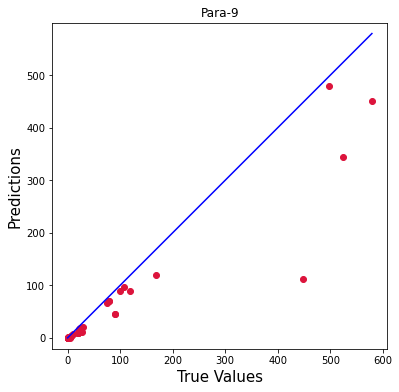

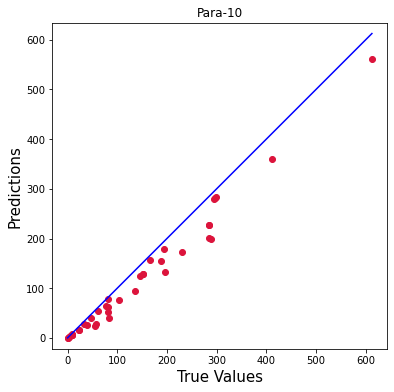

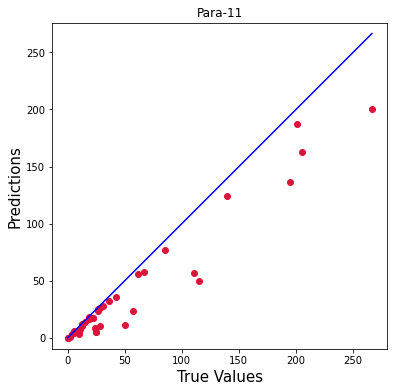

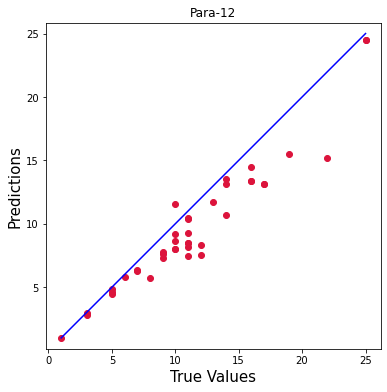

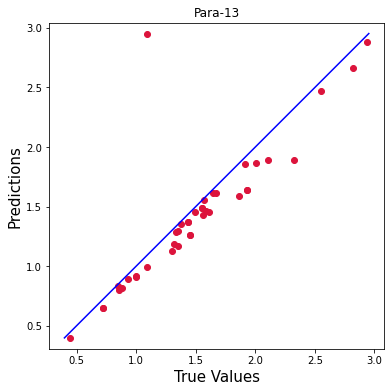

In [61]:
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')
    # plt.yscale('log')
    # plt.xscale('log')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()